### PCA 개요 

## 차원 축소 개요
- 차원축소 : 다차원 데이터 세트의 차원을 축소하여 시각적으로 데이터를 압축할 수 있음
- 차원 축소를 하는 이유 
    1. 차원이 증가할수록 데이터 포인트 간 거리가 멀어지고 희소한 구조 -> 예측 신뢰도 하락
    2. 피처가 많을 경우 개별 피처 간 상관관계가 높을 가능성이 큼 
- 차원 축소 분류 
    1. 피처 선책: 주요 피처만 선택, 나머지는 제거
    2. 피처 추출: 기존 피처를 저차원의 중요 피처로 압축하여 추출 ( 기존의 피처와 완전히 다른 값으로 변환 ) 
        -피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것 
        -기존 피처가 인지하기 어려웠던 잠재적 요소를 추출하는 것 
- 매우 많은 차원을 가지고 있는 이미지나 텍스트에서 차원 축소를 통해 잠재적인 의미를 찾아주는데 활용 
    -매우 많은 픽셀을 가진 이미지 데이터에서 잠재적 특성을 추출, 과적합 영향 감소, 예측 성능 증가
    -많은 단어로 구성된 텍스트의 숨겨진 의미를 추출 

## PCA (Principal component analysis)
### : 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 방법
- 가장 높은 분산(데이터 변동성이 가장 큰 방향)으로 축을 생성, 새롭게 생성된 축으로 데이터를 투영

- 선형 변환: 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환하는 것,특정 벡터를 하나의 공간에서 다른 공간으로 투영하는 개념
- 공분산: 두 변수간의 변동
- 공분산 행렬: 여러 변수와 관련된 공분산을 포함하는 정방형행렬(행=열)이자 대칭행렬(A^T=A)
> 개별 분산값을 대각 원소로 하는 대칭행렬
> 대칭행렬은 고유벡터를 직교행렬로, 고유값을 정방 행렬로 대각화할 수 있다. 

- 고유벡터: 행렬 A를 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터

- 정방행렬은 최대 그 차원 수만큼의 고유벡터를 가질 수 있다. 
- 고유벡터는 행렬이 작용하는 힘의 방향과 관계가 있어 행렬을 분해하는데 사용 

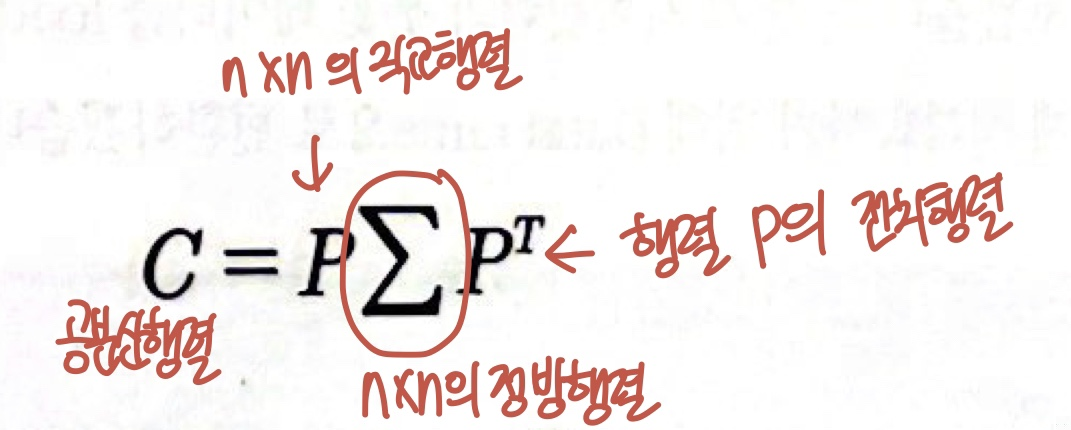

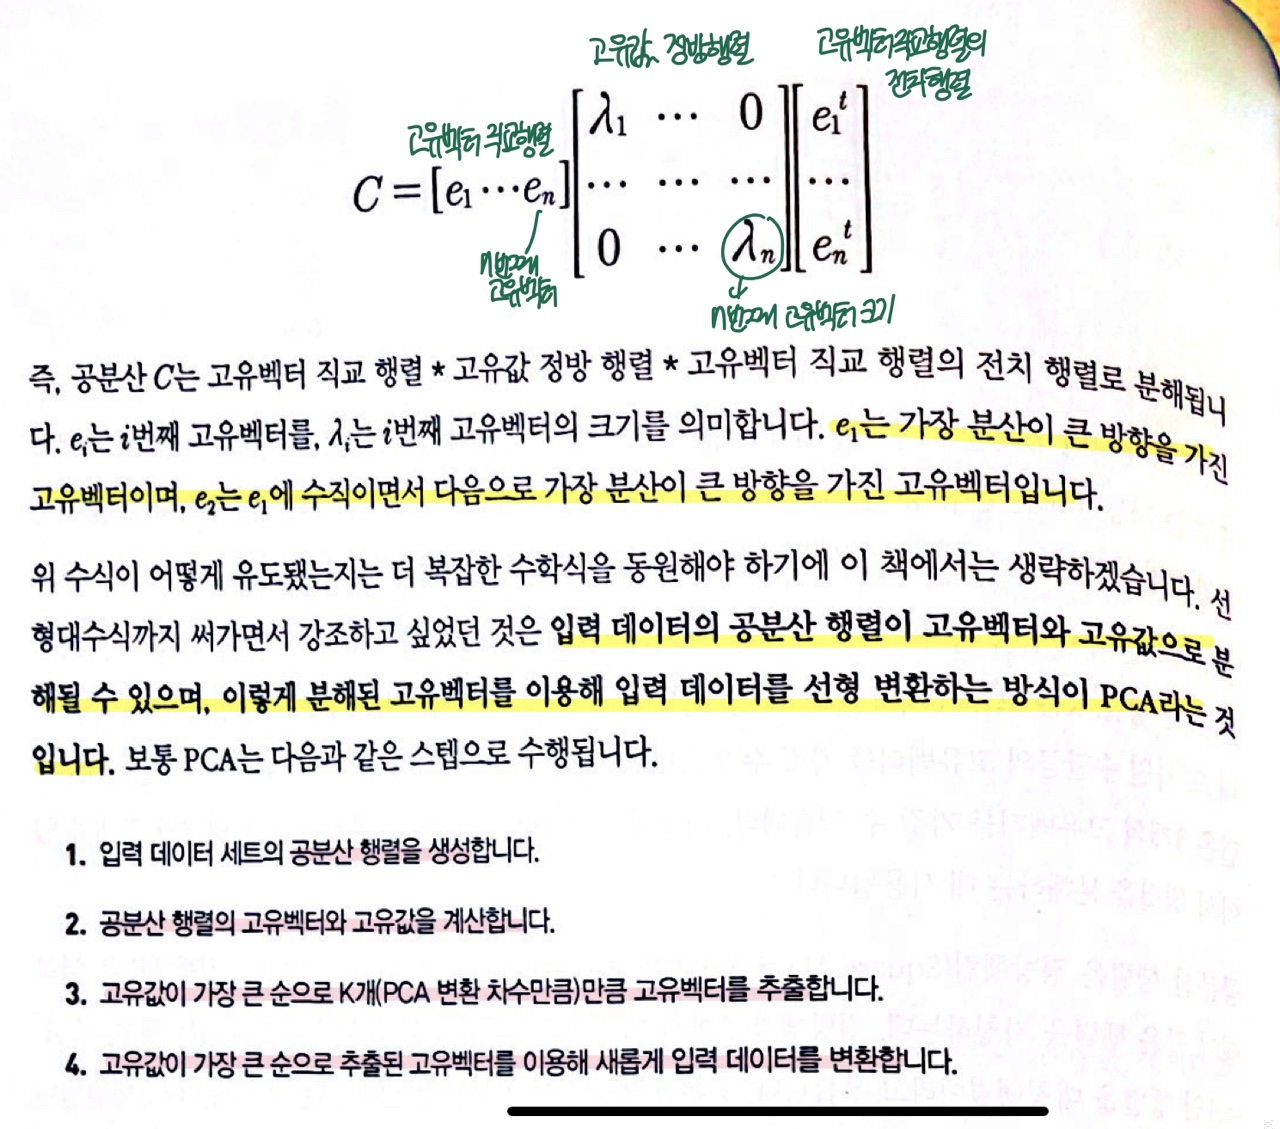

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


- 2차원 시각화

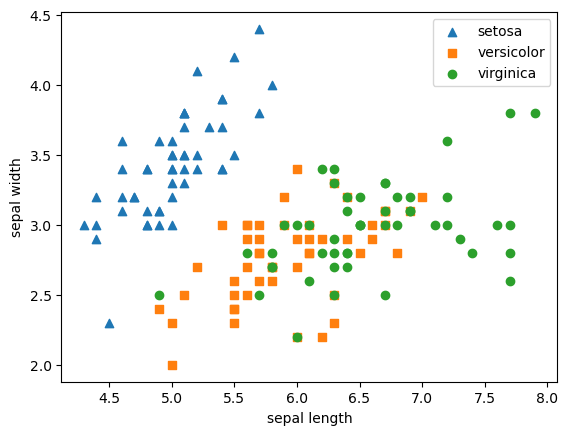

In [2]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

- SETOSA는 일정하게 분포 되어있으나, VER랑 VIR은 이 두개의 조건만으로 분류가 어려워 보임
> PCA로 4개 속성을 2개로 압축한 뒤 2개의 PCA속성으로 분포를 2차원으로 시각화하자

In [3]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용하여 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # PCA로 변환할 차원의 수 

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape) # 원본 데이터 세트를 (150,2) 데이터 세트로 변환 완료

(150, 2)


In [7]:
# DATAFRAME 변환한 뒤 데이터값 확인

# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

# 2개의 속성으로 변환된 데이터 세트를 이제 2차원상에서 시각화해보자

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


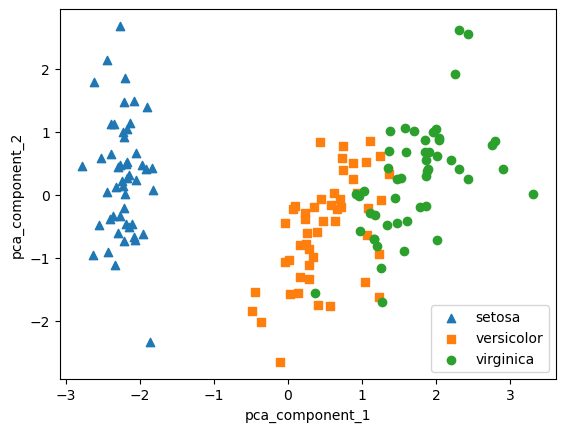

In [8]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

- VER, VIR는 PCA_COMPONENET_1축을 기준으로 서로 겹치는 부분 일부 있지만 비교적 잘 구분 되었다.
>이 첫번째 축이 원본 데이터의 변동성을 잘 반영했기 때문

In [10]:
#PCA COMPONENT 별로 원본 데이터의 변동성을 얼마나 반영하고 있는지 알아보는 방법 

print(pca.explained_variance_ratio_)

#PCA_COMPONENT_1: 전체 변동성의 약 72프로 차지, 2번째 축은 약 22프로차지
#2개 요소로만 변환해도 원본 데이터의 변동성을 95프로 설명 가능

[0.72962445 0.22850762]


In [11]:
#원본 붓꽃 데이터 세트와 PCA로 변환된 데이터 세트에 각각 분류(랜덤 포레스트)를 적용한 후 결과 비교

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [12]:
# 기존 4차원 데이터를 2차원으로 변환한 데이터 세트에 랜덤 포레스트 적용
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


> 원본에 비해 예측 성능이 떨어질 수 밖에 없지만, 4개 속성이 절반, 속성 개수가 50프로로 감소한 걸 고려하면, 변환 이후에도 원본 데이터의 특성을 상당부분 유지하고 있다.

* credit card 데이터 세트 PCA 변환

In [13]:
# header로 의미 없는 첫 행 제거, iloc로 기존 id 제거
import pandas as pd

df = pd.read_excel('pca_credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


- 30000개 레코드, 24개의 속성
- default payment next month(타겟값): 다음달 연체 여부 (연체:1, 정상납부:0)

In [16]:
# pay0다음 pay2인걸 1로 바꾸고, 타겟값 너무 길어서 default로 변환
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1) # 타겟값 제외한 df로 만들기

In [17]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

<AxesSubplot:>

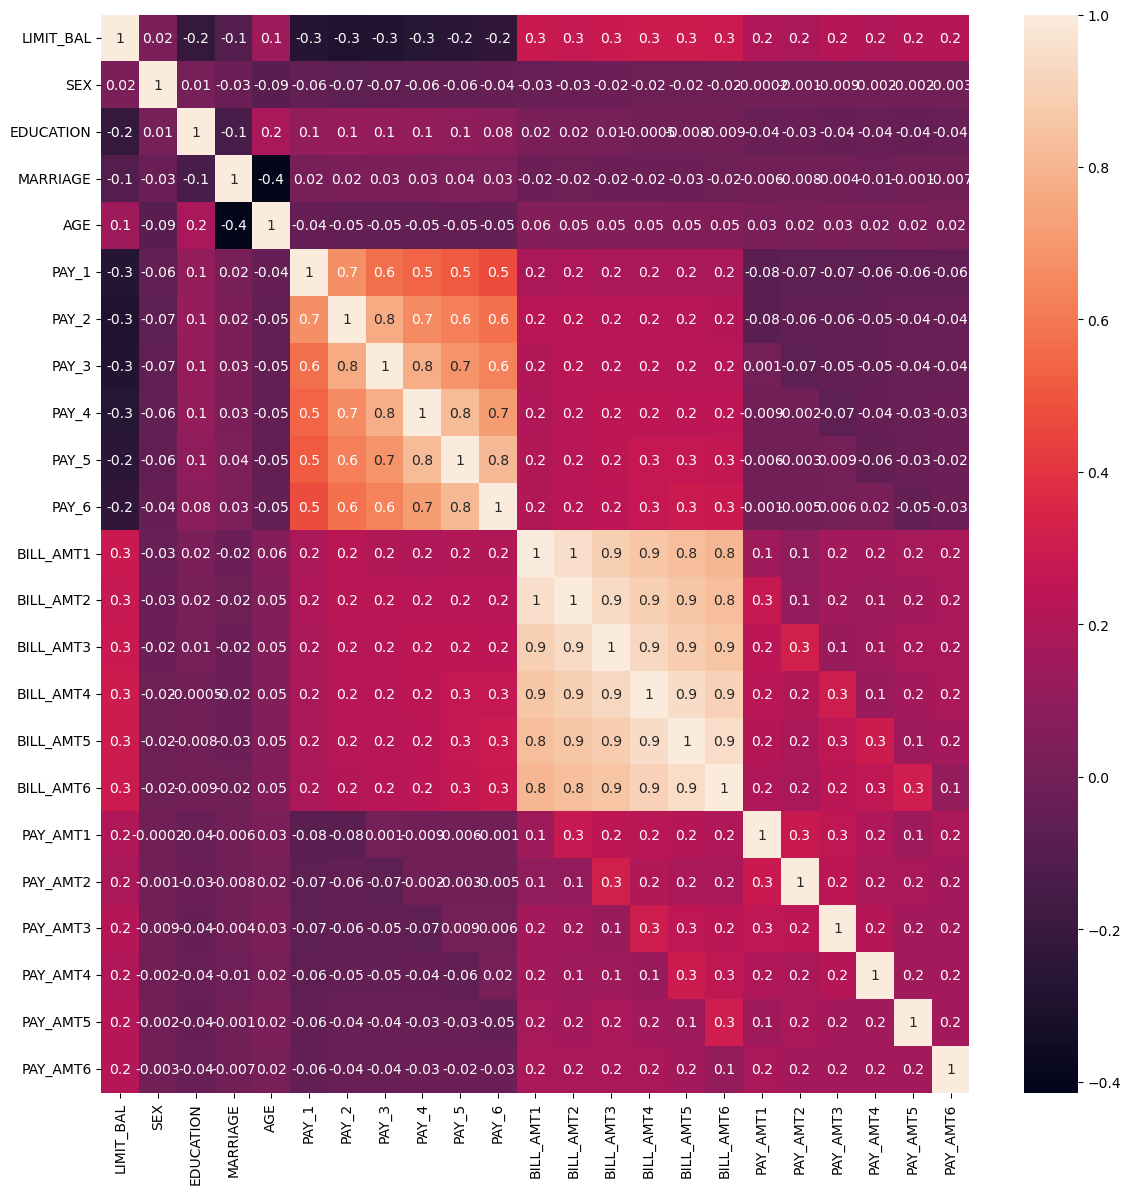

In [18]:
# 각 속성끼리 상관도가 높으므로, 각 속성간 상관도를 구한 후 heatmap으로 시각화 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')


- bill_amt1~6 간 상관도가 대부분 0.9 이상으로 높다
- pay_1~pay_6 간 상관도도 대부분 높다. 
> 높은 상관도를 가진 속성들은 소수의 pca만으로도 속성들의 변동성을 수용할 수 있다. 
> bill_amt1~6가지의 6개 속성을 2개의 컴포넌트로 pca 변환한 뒤 개별 컴포넌트의 변동성을 알아보자

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
cols_pay = ['PAY_' + str(i) for i in range(1, 7)]
cols_amt = ['PAY_AMT' + str(i) for i in range(1, 7)]
print(cols_bill)
cols_bill.extend(cols_pay)
cols_bill.extend(cols_amt)
print('대상 속성명:',cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산 위해 fit( ) 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
X_features.loc[:, cols_bill] = df_cols_scaled
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

# 2개의 component만으로도 6개 속성의 변동성을 약 95프로 이상 설명할 수 있다. 
# 특히 첫번재 축으로 90프로 변동성을 수용할 정도로 이 6개 속성의 상관도가 매우 높다. 

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
PCA Component별 변동성: [0.36180187 0.20618472]


In [21]:
# 원본 데이터 분류 예측 결과 vs pca 변환 데이터 분류 예측 결과 
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))


CV=3 인 경우의 개별 Fold세트별 정확도: [0.8081 0.8197 0.8232]
평균 정확도:0.8170


In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행. 
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7917 0.7971 0.801 ]
PCA 변환 데이터 셋 평균 정확도:0.7966
